There's a population of simulated galaxies with high $FUV-NUV$ values, not observed in SDSS, that DEM cannot reproduce. Here I'll look at what type of galaxies these are. 

## Conclusions
The majority of these galaxies are quiescent with SFR = 0. It seems that the **SFR resolution** impacts the SED and produces high FUV-NUV. One way to deal with this may be to sample the SFHs within the SFR resolution in order to avoid SFR = 0 situations. 

In [1]:
from IPython.display import Image

In [2]:
Image(url= "https://user-images.githubusercontent.com/1895640/77599379-b0ab9600-6ec1-11ea-93c0-210823e7bb98.png")

In [3]:
import os
import h5py
import numpy as np 
# -- galpopfm
from galpopfm import dustfm as dustFM
from galpopfm import dust_infer as dustInfer
from galpopfm import measure_obs as measureObs
# -- plotting --
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [4]:
sim_sed = dustInfer._read_sed('simba')

In [23]:
logsfr = sim_sed['logsfr.100']
logsfr[logsfr == -999] = -2.5

In [7]:
F_mag = measureObs.AbsMag_sed(sim_sed['wave'], sim_sed['sed_neb'], band='galex_fuv')
N_mag = measureObs.AbsMag_sed(sim_sed['wave'], sim_sed['sed_neb'], band='galex_nuv')

In [8]:
FN = F_mag - N_mag

(0.0, 25000.0)

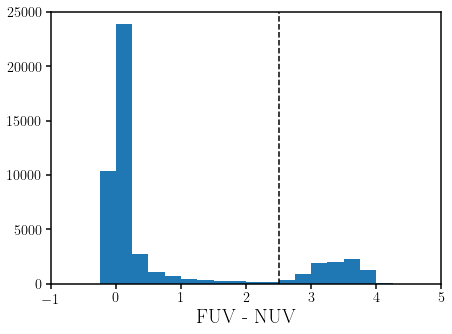

In [16]:
fig = plt.figure(figsize=(7,5))
sub = fig.add_subplot(111)
sub.hist(FN, range=(-1., 5), bins=24)
sub.vlines(2.5, 0., 25000, color='k', linestyle='--')
sub.set_xlabel("FUV - NUV", fontsize=20)
sub.set_xlim(-1., 5.)
sub.set_ylim(0., 25000.)

In [21]:
high_fn = (FN > 2.5)
print('%i galaxies with high FUV-NUV' % np.sum(high_fn))

8747 galaxies with high FUV-NUV


Lets examine these galaxies in the $M_*$-SFR relation

(-2.6, 1.5)

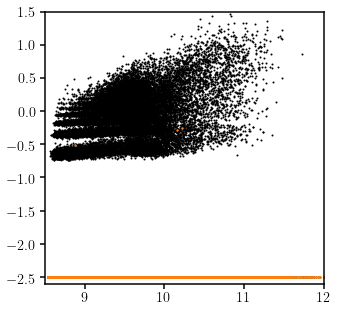

In [25]:
fig = plt.figure(figsize=(5,5))
sub = fig.add_subplot(111)
sub.scatter(sim_sed['logmstar'], logsfr, c='k', s=1)
sub.scatter(sim_sed['logmstar'][high_fn], logsfr[high_fn], c='C1', s=2)
sub.set_xlim(8.5, 12.)
sub.set_ylim(-2.6, 1.5)

In SIMBA these are almost entirely galaxies with SFR = 0. Now lets check TNG

(0.0, 25000.0)

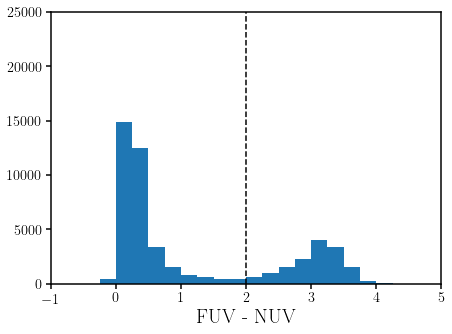

In [29]:
sim_sed = dustInfer._read_sed('tng')
logsfr = sim_sed['logsfr.100']
logsfr[logsfr == -999] = -2.5

F_mag = measureObs.AbsMag_sed(sim_sed['wave'], sim_sed['sed_neb'], band='galex_fuv')
N_mag = measureObs.AbsMag_sed(sim_sed['wave'], sim_sed['sed_neb'], band='galex_nuv')

FN = F_mag - N_mag

fig = plt.figure(figsize=(7,5))
sub = fig.add_subplot(111)
sub.hist(FN, range=(-1., 5), bins=24)
sub.vlines(2., 0., 25000, color='k', linestyle='--')
sub.set_xlabel("FUV - NUV", fontsize=20)
sub.set_xlim(-1., 5.)
sub.set_ylim(0., 25000.)

14673 galaxies with high FUV-NUV


(-2.6, 1.5)

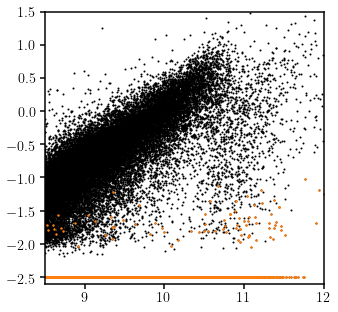

In [30]:
high_fn = (FN > 2.)
print('%i galaxies with high FUV-NUV' % np.sum(high_fn))

fig = plt.figure(figsize=(5,5))
sub = fig.add_subplot(111)
sub.scatter(sim_sed['logmstar'], logsfr, c='k', s=1)
sub.scatter(sim_sed['logmstar'][high_fn], logsfr[high_fn], c='C1', s=2)
sub.set_xlim(8.5, 12.)
sub.set_ylim(-2.6, 1.5)